In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
	messages: Annotated[list,add_messages]

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
llm=ChatOpenAI(model="gpt-4o-mini",temperature=0)
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-Cj5KoosyklGtWtr1YCGbqwMReHYt4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--1ab828ad-0f09-497e-b0fc-1e8c023703e8-0', usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [2]:
llm_groq=ChatGroq(model="llama-3.1-8b-instant",temperature=0)
llm_groq.invoke("Hey I am a John Doe I like a python programming!")


AIMessage(content="Nice to meet you, John Doe. Python is a fantastic programming language, known for its simplicity, readability, and versatility. What do you like to do with Python? Are you working on a project, or just exploring the language?\n\nIf you're new to Python, I'd be happy to help you get started. If you're already familiar with it, we can discuss some advanced topics or projects you're working on.\n\nSome popular areas of Python programming include:\n\n1. Data Science and Machine Learning\n2. Web Development (e.g., Flask, Django)\n3. Automation and Scripting\n4. Scientific Computing and Research\n5. Game Development\n\nLet me know if any of these areas interest you, or if you have something else in mind!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 47, 'total_tokens': 200, 'completion_time': 0.234355648, 'completion_tokens_details': None, 'prompt_time': 0.002283529, 'prompt_tokens_details': None, 'queue_time': 0.0547

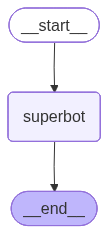

In [4]:
## Creating nodes
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State)->State:
	return {"messages":[llm.invoke(state["messages"])]}

graph=StateGraph(State)
## node
graph.add_node("superbot",superbot)
## edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

graph_builder=graph.compile(checkpointer=memory)
## Display the graph
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [6]:
## Invocation 
config={"configurable":{"thread_id":"1"}}
graph_builder.invoke({"messages":"Hi,My name is John Doe I like a python programming!"},config=config)

{'messages': [HumanMessage(content='Hi,My name is John Doe I like a python programming!', additional_kwargs={}, response_metadata={}, id='026dc81a-0ee0-4a74-a40a-e3ca61b746f3'),
  AIMessage(content="Hi John Doe! It's great to hear that you enjoy Python programming! Python is a versatile language that's great for everything from web development to data analysis and machine learning. Do you have any specific projects you're working on or topics you're interested in exploring further?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 20, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-Cj5Rp5JzXZOYxvzKTEeuvQQEZ3xZR', 'service_tie

### Streaming The Reasoning With Stream Methods


In [8]:
#Create a thread
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({"messages":"Hi,My name is John Doe I like a python programming!"},config=config,stream_mode="updates"):
	print(chunk)







{'superbot': {'messages': [AIMessage(content="Hi John Doe! It's great to hear that you enjoy Python programming! Python is a versatile language that's great for everything from web development to data analysis and machine learning. Do you have any specific projects you're working on or topics you're interested in exploring further?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 20, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-Cj5VUpaXVV7unZXduVMu7VaoT3gbC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3af76238-e2bd-412e-8bd1-0ca7cd9f08d4-0', usage_metadata={'input_tokens': 20, 'outp

In [9]:
for chunk in graph_builder.stream({"messages":"Hi,My name is John Doe I like a python programming!"},config=config,stream_mode="values"):
	print(chunk)


{'messages': [HumanMessage(content='Hi,My name is John Doe I like a python programming!', additional_kwargs={}, response_metadata={}, id='25e408cf-2a80-44e4-95d6-c8653b7f4f53'), AIMessage(content="Hi John Doe! It's great to hear that you enjoy Python programming! Python is a versatile language that's great for everything from web development to data analysis and machine learning. Do you have any specific projects you're working on or topics you're interested in exploring further?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 20, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-Cj5VUpaXVV7unZXduVMu7VaoT3gbC', 'service_tier'

In [10]:
for chunk in graph_builder.stream({"messages":"Hi,My name is John Doe I also like a javascript programming!"},config=config,stream_mode="updates"):
	print(chunk)


{'superbot': {'messages': [AIMessage(content="Hi John Doe! That's awesome! JavaScript is a powerful language, especially for web development. It pairs well with Python, too, especially if you're working on full-stack applications. Do you have a preference for front-end or back-end development, or are you exploring both?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 157, 'total_tokens': 212, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_50906f2aac', 'id': 'chatcmpl-Cj5XuHR5mCBG3lN5lnBoQBoqSV98W', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--9e1a3410-0373-46e7-8688-55ff76aca463-0', usage_metadata={'input_tokens': 157, 'output_tokens

In [11]:
for chunk in graph_builder.stream({"messages":"I love programming"},config=config,stream_mode="updates"):
	print(chunk)

{'superbot': {'messages': [AIMessage(content="That's wonderful to hear! Programming can be a very rewarding and creative pursuit. It allows you to solve problems, build applications, and even automate tasks. Do you have any favorite projects you've worked on, or are there specific areas of programming you're particularly passionate about?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 223, 'total_tokens': 275, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_50906f2aac', 'id': 'chatcmpl-Cj5Yx8VieXQO4OqcqcoTnNJqb59S6', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--38b8fb48-6622-4e11-8068-f3bcc78e92b3-0', usage_metadata={'input_tokens': 

In [12]:
config={"configurable":{"thread_id":"3"}}
async for event in graph_builder.astream_events({"messages":"Hi my name is John Doe I like a python programming!"},
config=config,version="v2"):
	print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi my name is John Doe I like a python programming!'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '482a1ddc-9517-4679-8f50-52138d691652', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is John Doe I like a python programming!', additional_kwargs={}, response_metadata={}, id='2e9b9aac-f9a7-4d4c-a118-6594816fba0e')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': '880076ee-db3f-4c29-8eb6-c1be549ac0c7', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:9fc5e538-ca3b-4d8e-276c-22bbda49ec34'}, 'parent_ids': ['482a1ddc-9517-4679-8f50-52138d691652']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is John Doe I like